In [2]:
from google.colab import files
uploaded = files.upload()

Saving youtube_comments.csv to youtube_comments.csv


In [6]:
# ============================================================
# 🔧 PRE-PROCESSING LANGSUNG DARI FILE MENTAH (NORMALISASI)
# ============================================================

import pandas as pd
import re

df = pd.read_csv('youtube_comments.csv')
print("📋 Kolom yang tersedia:", df.columns.tolist())

if 'comment' not in df.columns:
    raise KeyError("❌ Kolom 'comment' tidak ditemukan dalam file CSV.")

def clean_text(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip().lower()

df['clean_comment'] = df['comment'].astype(str).apply(clean_text)

normalisasi_dict = {
    'gk': 'tidak', 'ga': 'tidak', 'nggak': 'tidak', 'ngga': 'tidak', 'kagak': 'tidak',
    'bgt': 'banget', 'bngt': 'banget', 'bgd': 'banget',
    'aja': 'saja', 'aj': 'saja', 'doang': 'saja',
    'yg': 'yang', 'yng': 'yang',
    'tp': 'tapi', 'tpi': 'tapi',
    'dgn': 'dengan', 'sm': 'sama', 'sma': 'sama',
    'dr': 'dari', 'utk': 'untuk', 'u': 'untuk',
    'trs': 'terus', 'trus': 'terus', 'blm': 'belum',
    'udh': 'sudah', 'sdh': 'sudah', 'dah': 'sudah', 'udah': 'sudah',
    'mksh': 'makasih', 'makasi': 'makasih', 'makasih': 'terima kasih',
    'thx': 'terima kasih', 'thanks': 'terima kasih', 'tq': 'terima kasih',
    'dlm': 'dalam', 'knp': 'kenapa', 'krn': 'karena', 'karna': 'karena',
    'nih': 'ini', 'nie': 'ini', 'ni': 'ini', 'n': 'dan', 'dn': 'dan',
    'btw': 'ngomong-ngomong', 'cm': 'cuma', 'cuma': 'hanya',
    'bsk': 'besok', 'tlg': 'tolong', 'pls': 'tolong', 'plis': 'tolong',
    'bbrp': 'beberapa', 'jd': 'jadi', 'gw': 'saya', 'gue': 'saya',
    'loe': 'kamu', 'lu': 'kamu', 'elo': 'kamu', 'wkwk': 'haha', 'wkwwk': 'haha',
    'haha': 'tertawa', 'mantul': 'mantap betul', 'btul': 'betul',
    'ok': 'oke', 'okee': 'oke', 'sip': 'oke', 'sippp': 'oke'
}

def normalize_text(text):
    words = text.split()
    normalized_words = [normalisasi_dict.get(w, w) for w in words]
    return ' '.join(normalized_words)

df['normalized_comment'] = df['clean_comment'].apply(normalize_text)

print("\n✅ Contoh hasil normalisasi:")
print(df[['comment', 'normalized_comment']].head())

output_filename = 'youtube_comments_normalized_from_raw.csv'
df.to_csv(output_filename, index=False)

from google.colab import files
files.download(output_filename)

📋 Kolom yang tersedia: ['author', 'comment']

✅ Contoh hasil normalisasi:
                                             comment  \
0  Over capacity ko masih impor, logikanya dimana...   
1  Lanjutkan pak Purbaya kami rakyat Indonesia di...   
2  BANGUN KILANG BARU: Menguntungkan bagi Indones...   
3              MANTAP PAK KOBOI PURBAYA❤ MENKEU RI🇮🇩   
4  Pak prabowo tolong ganti mentri esdm, bahlil h...   

                                  normalized_comment  
0  over capacity ko masih impor logikanya dimana ...  
1  lanjutkan pak purbaya kami rakyat indonesia di...  
2  bangun kilang baru menguntungkan bagi indonesi...  
3                 mantap pak koboi purbaya menkeu ri  
4  pak prabowo tolong ganti mentri esdm bahlil ha...  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# ============================================================
# 🧹 PRE-PROCESSING LANGKAH: REMOVE DUPLICATE COMMENTS
# ============================================================

import pandas as pd

df = pd.read_csv('youtube_comments.csv')
print("📋 Jumlah data awal:", len(df))

if 'comment' not in df.columns:
    raise KeyError("❌ Kolom 'comment' tidak ditemukan dalam file CSV. Pastikan kolom bernama 'comment'.")

df_cleaned = df.drop_duplicates(subset=['comment'], keep='first').reset_index(drop=True)
print("✅ Jumlah data setelah remove duplicate:", len(df_cleaned))

print("\n🔍 Contoh data setelah dihapus duplikat:")
print(df_cleaned.head())

output_filename = 'youtube_comments_no_duplicate.csv'
df_cleaned.to_csv(output_filename, index=False)

from google.colab import files
files.download(output_filename)

📋 Jumlah data awal: 1000
✅ Jumlah data setelah remove duplicate: 997

🔍 Contoh data setelah dihapus duplikat:
                 author                                            comment
0  @ributandiastoto1516  Over capacity ko masih impor, logikanya dimana...
1         @hermance1838  Lanjutkan pak Purbaya kami rakyat Indonesia di...
2               @redz3y  BANGUN KILANG BARU: Menguntungkan bagi Indones...
3            @KDMtv-q4e              MANTAP PAK KOBOI PURBAYA❤ MENKEU RI🇮🇩
4        @noworries-g4b  Pak prabowo tolong ganti mentri esdm, bahlil h...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# ============================================================
# 🔠 PRE-PROCESSING LANGKAH: BIGRAM (VERSI FIXED)
# ============================================================

import pandas as pd
from nltk import bigrams
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

df = pd.read_csv('youtube_comments.csv')

if 'comment' not in df.columns:
    raise KeyError("❌ Kolom 'comment' tidak ditemukan dalam file CSV. Pastikan ada kolom bernama 'comment'.")

df['clean_comment'] = df['comment'].astype(str).str.lower()

df['tokens'] = df['clean_comment'].apply(word_tokenize)

df['bigrams'] = df['tokens'].apply(lambda x: list(bigrams(x)))

print("🔍 Contoh hasil Bigram:")
for b in df['bigrams'].head(3):
    print(b)
    print("----")

output_filename = 'youtube_comments_bigram.csv'
df.to_csv(output_filename, index=False)

from google.colab import files
files.download(output_filename)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


🔍 Contoh hasil Bigram:
[('over', 'capacity'), ('capacity', 'ko'), ('ko', 'masih'), ('masih', 'impor'), ('impor', ','), (',', 'logikanya'), ('logikanya', 'dimana'), ('dimana', '?'), ('?', 'salah'), ('salah', 'satu'), ('satu', 'mafianya'), ('mafianya', 'nongol😂😂😂')]
----
[('lanjutkan', 'pak'), ('pak', 'purbaya'), ('purbaya', 'kami'), ('kami', 'rakyat'), ('rakyat', 'indonesia'), ('indonesia', 'di'), ('di', 'kalimantan'), ('kalimantan', 'mendukung'), ('mendukung', 'dan'), ('dan', 'selalu'), ('selalu', 'memantau'), ('memantau', 'bapak'), ('bapak', 'tim'), ('tim', 'dan'), ('dan', 'keluarga'), ('keluarga', 'atas'), ('atas', 'keselamatan'), ('keselamatan', 'bapak'), ('bapak', 'bapak'), ('bapak', 'semua.kalau'), ('semua.kalau', 'bapak'), ('bapak', 'terancam'), ('terancam', 'kami'), ('kami', 'ada'), ('ada', 'di'), ('di', 'sekitar'), ('sekitar', 'bapak'), ('bapak', 'dan'), ('dan', 'keluarga'), ('keluarga', '.')]
----
[('bangun', 'kilang'), ('kilang', 'baru'), ('baru', ':'), (':', 'menguntungkan')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# ============================================================
# 🔡 PRE-PROCESSING LANGKAH: TRIGRAM
# ============================================================

import pandas as pd
from nltk import trigrams
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

df = pd.read_csv('youtube_comments.csv')

if 'comment' not in df.columns:
    raise KeyError("❌ Kolom 'comment' tidak ditemukan dalam file CSV. Pastikan ada kolom bernama 'comment'.")

df['clean_comment'] = df['comment'].astype(str).str.lower()

df['tokens'] = df['clean_comment'].apply(word_tokenize)

df['trigrams'] = df['tokens'].apply(lambda x: list(trigrams(x)))

print("🔍 Contoh hasil Trigram:")
for t in df['trigrams'].head(3):
    print(t)
    print("----")

output_filename = 'youtube_comments_trigram.csv'
df.to_csv(output_filename, index=False)

from google.colab import files
files.download(output_filename)

🔍 Contoh hasil Trigram:
[('over', 'capacity', 'ko'), ('capacity', 'ko', 'masih'), ('ko', 'masih', 'impor'), ('masih', 'impor', ','), ('impor', ',', 'logikanya'), (',', 'logikanya', 'dimana'), ('logikanya', 'dimana', '?'), ('dimana', '?', 'salah'), ('?', 'salah', 'satu'), ('salah', 'satu', 'mafianya'), ('satu', 'mafianya', 'nongol😂😂😂')]
----
[('lanjutkan', 'pak', 'purbaya'), ('pak', 'purbaya', 'kami'), ('purbaya', 'kami', 'rakyat'), ('kami', 'rakyat', 'indonesia'), ('rakyat', 'indonesia', 'di'), ('indonesia', 'di', 'kalimantan'), ('di', 'kalimantan', 'mendukung'), ('kalimantan', 'mendukung', 'dan'), ('mendukung', 'dan', 'selalu'), ('dan', 'selalu', 'memantau'), ('selalu', 'memantau', 'bapak'), ('memantau', 'bapak', 'tim'), ('bapak', 'tim', 'dan'), ('tim', 'dan', 'keluarga'), ('dan', 'keluarga', 'atas'), ('keluarga', 'atas', 'keselamatan'), ('atas', 'keselamatan', 'bapak'), ('keselamatan', 'bapak', 'bapak'), ('bapak', 'bapak', 'semua.kalau'), ('bapak', 'semua.kalau', 'bapak'), ('semua.ka

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


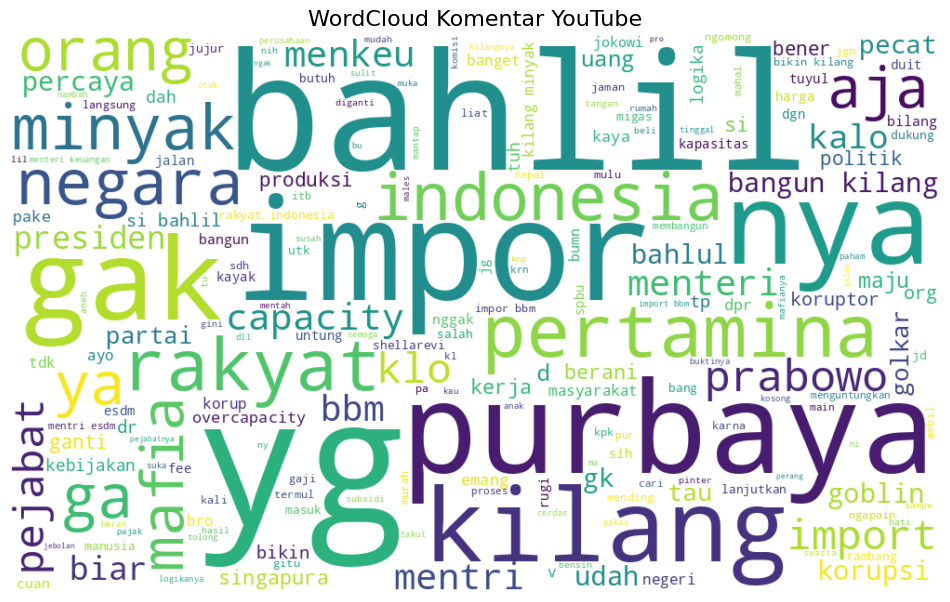

In [11]:
# ============================================================
# ☁️ PRE-PROCESSING & WORDCLOUD DARI KOMENTAR MENTAH YOUTUBE
# ============================================================

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

df = pd.read_csv('youtube_comments.csv')

if 'comment' not in df.columns:
    raise KeyError("❌ Kolom 'comment' tidak ditemukan dalam file CSV. Pastikan kolom bernama 'comment'.")

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_comment'] = df['comment'].apply(clean_text)

stop_words = set(stopwords.words('indonesian'))
df['tokens'] = df['clean_comment'].apply(lambda x: [w for w in word_tokenize(x) if w not in stop_words])

all_words = ' '.join([' '.join(tokens) for tokens in df['tokens']])

wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Komentar YouTube", fontsize=16)
plt.show()